# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display 
from datetime import datetime

# Data cleaning

In [2]:
# Dataset is from https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data
# The data was reduced to include only listings in Michigan so it would be a more manageable size.

df = pd.read_csv('data.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7317001245,https://annarbor.craigslist.org/ctd/d/chelsea-...,ann arbor,https://annarbor.craigslist.org,22568,2014.0,ram,1500 sport 4wd!crew cab,excellent,8 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/00V0V_eOn5F7ugih...,$359/mo - 2014 Ram 1500 Sport 4WD!Crew 4 WD!Cr...,NaN,mi,42.300673,-84.024108,2021-05-04T19:02:43-0400
1,7316994793,https://annarbor.craigslist.org/cto/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,850,1998.0,rover,discovery,fair,8 cylinders,...,mid-size,SUV,green,https://images.craigslist.org/00t0t_jRN9hp58ep...,This Land Rover Discovery is an 'Original' Goo...,NaN,mi,42.232800,-83.701500,2021-05-04T18:48:42-0400
2,7316993712,https://annarbor.craigslist.org/cto/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,6500,2004.0,ford,f-350,good,8 cylinders,...,full-size,NaN,white,https://images.craigslist.org/00u0u_9iOtn3CZJm...,"Truck runs great, plow included . Heads done a...",NaN,mi,42.304200,-83.706800,2021-05-04T18:46:09-0400
3,7316993192,https://annarbor.craigslist.org/cto/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,2800,2005.0,toyota,avalon,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01313_2Hj4x4Wlym...,This is my car that I have been driving every ...,NaN,mi,42.279400,-83.784000,2021-05-04T18:44:57-0400
4,7316942502,https://annarbor.craigslist.org/ctd/d/brighton...,ann arbor,https://annarbor.craigslist.org,4380,2006.0,jeep,grand cherokee laredo 4wd,excellent,6 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/00Z0Z_ig87qt9CwF...,2006 Jeep Grand Cherokee Laredo 4WD! 4 WD! 4-W...,NaN,mi,42.568136,-83.813674,2021-05-04T17:03:11-0400


In [3]:
# Remove columns will not be used
df = df.drop([
    'id',
    'region', 
    'url', 
    'region_url', 
    'image_url', 
    'VIN', 
    'title_status', 
    'region', 
    'transmission', 
    'drive', 
    'size', 
    'description', 
    'county', 
    'lat', 
    'long', 
    'posting_date'
], axis=1)

df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,type,paint_color,state
0,22568,2014.0,ram,1500 sport 4wd!crew cab,excellent,8 cylinders,gas,133275.0,truck,NaN,mi
1,850,1998.0,rover,discovery,fair,8 cylinders,gas,123780.0,SUV,green,mi
2,6500,2004.0,ford,f-350,good,8 cylinders,diesel,250000.0,NaN,white,mi
3,2800,2005.0,toyota,avalon,NaN,NaN,gas,199500.0,NaN,NaN,mi
4,4380,2006.0,jeep,grand cherokee laredo 4wd,excellent,6 cylinders,gas,160252.0,SUV,NaN,mi


In [4]:
df.nlargest(10, 'price')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,type,paint_color,state
124,123456789,2015.0,chevrolet,cruze,like new,NaN,gas,64181.0,sedan,red,mi
13468,123456789,2003.0,NaN,Chevy/gmc,good,8 cylinders,diesel,1234567.0,pickup,NaN,mi
680,1234567,2010.0,lincoln,mkt ecoboost,like new,NaN,gas,85653.0,SUV,custom,mi
15005,554900,2019.0,NaN,f250 xlt crewcab,excellent,8 cylinders,gas,25365.0,pickup,white,mi
5698,195000,2014.0,cadillac,srx awd luxury,like new,NaN,gas,47814.0,SUV,white,mi
8211,195000,2017.0,subaru,wrx,like new,4 cylinders,gas,73000.0,sedan,grey,mi
6658,125000,1941.0,NaN,Willys,excellent,8 cylinders,gas,12000.0,NaN,NaN,mi
10021,122420,2017.0,audi,NaN,NaN,10 cylinders,other,16613.0,other,NaN,mi
1797,119500,2015.0,NaN,Lamborghini Huracan,NaN,10 cylinders,gas,1.0,coupe,custom,mi
8103,115990,2021.0,ram,1500,NaN,8 cylinders,gas,218.0,truck,blue,mi


In [5]:
df.nsmallest(10, 'price')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,type,paint_color,state
11,0,2019.0,honda,accord,NaN,NaN,gas,25626.0,sedan,silver,mi
60,0,2020.0,nissan,maxima,NaN,NaN,gas,12982.0,sedan,black,mi
99,0,2019.0,honda,cr-v,NaN,NaN,gas,25626.0,SUV,orange,mi
138,0,2015.0,toyota,highlander,NaN,NaN,gas,100000.0,wagon,green,mi
174,0,2008.0,chrysler,NaN,NaN,NaN,gas,150000.0,NaN,NaN,mi
176,0,2018.0,ford,explorer,NaN,NaN,gas,60548.0,SUV,white,mi
231,0,2018.0,ford,explorer,NaN,NaN,gas,25760.0,SUV,white,mi
267,0,2015.0,chevrolet,corvette,NaN,NaN,gas,22175.0,other,white,mi
304,0,2015.0,chevrolet,corvette,NaN,NaN,gas,25763.0,other,black,mi
358,0,2018.0,ford,explorer,NaN,NaN,gas,40700.0,SUV,NaN,mi


In [6]:
# Remove rows with extremely high or extremely low prices
df = df[df['price'] <= 100000]
df = df[df['price'] >= 800]

In [7]:
# Fill missing fields with the most common value (mode)
for column_name in ['manufacturer', 'model', 'condition', 'fuel', 'type', 'paint_color', 'cylinders']:
    mode_value = df[column_name].mode().iloc[0]
    df[column_name] = df[column_name].fillna(mode_value)

df.describe(include = 'all')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,type,paint_color,state
count,16020.000000,16017.000000,16020,16020,16020,16020,16020,1.598400e+04,16020,16020,16020
unique,NaN,NaN,40,2890,6,8,5,NaN,13,12,1
top,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,SUV,white,mi
freq,NaN,NaN,4036,528,11449,11157,14349,NaN,8717,8929,16020
mean,16110.635206,2011.415746,NaN,NaN,NaN,NaN,NaN,1.098058e+05,NaN,NaN,NaN
std,12743.298998,7.934007,NaN,NaN,NaN,NaN,NaN,1.388243e+05,NaN,NaN,NaN
min,800.000000,1923.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,6400.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,4.350000e+04,NaN,NaN,NaN
50%,11985.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,1.120885e+05,NaN,NaN,NaN
75%,23900.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,1.568090e+05,NaN,NaN,NaN


In [8]:
values = {"year": 0, "odometer": 0, "price": 0}
df = df.fillna(value=values)

# Fill numeric columns with mean
numeric_columns = ['year', 'odometer', 'price']
for column in numeric_columns:
    # Calculate the mean of non-zero values in the 'price' column & replace prices of 0 with it
    mean_price = df.loc[df[column] != 0, column].mean()
    df[column] = df[column].replace(0, mean_price)
    df[column] = df[column].fillna(df[column].mean())

df.describe(include = 'all')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,type,paint_color,state
count,16020.000000,16020.000000,16020,16020,16020,16020,16020,1.602000e+04,16020,16020,16020
unique,NaN,NaN,40,2890,6,8,5,NaN,13,12,1
top,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,SUV,white,mi
freq,NaN,NaN,4036,528,11449,11157,14349,NaN,8717,8929,16020
mean,16110.635206,2011.415746,NaN,NaN,NaN,NaN,NaN,1.105876e+05,NaN,NaN,NaN
std,12743.298998,7.933264,NaN,NaN,NaN,NaN,NaN,1.383591e+05,NaN,NaN,NaN
min,800.000000,1923.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN
25%,6400.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,4.565975e+04,NaN,NaN,NaN
50%,11985.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,1.120000e+05,NaN,NaN,NaN
75%,23900.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,1.567770e+05,NaN,NaN,NaN


In [9]:
# Add an 'age' column so we have data relative to the current date
current_year = datetime.now().year
df['age'] = current_year - df['year']

# Visual #1: Car Count by Manufacturer

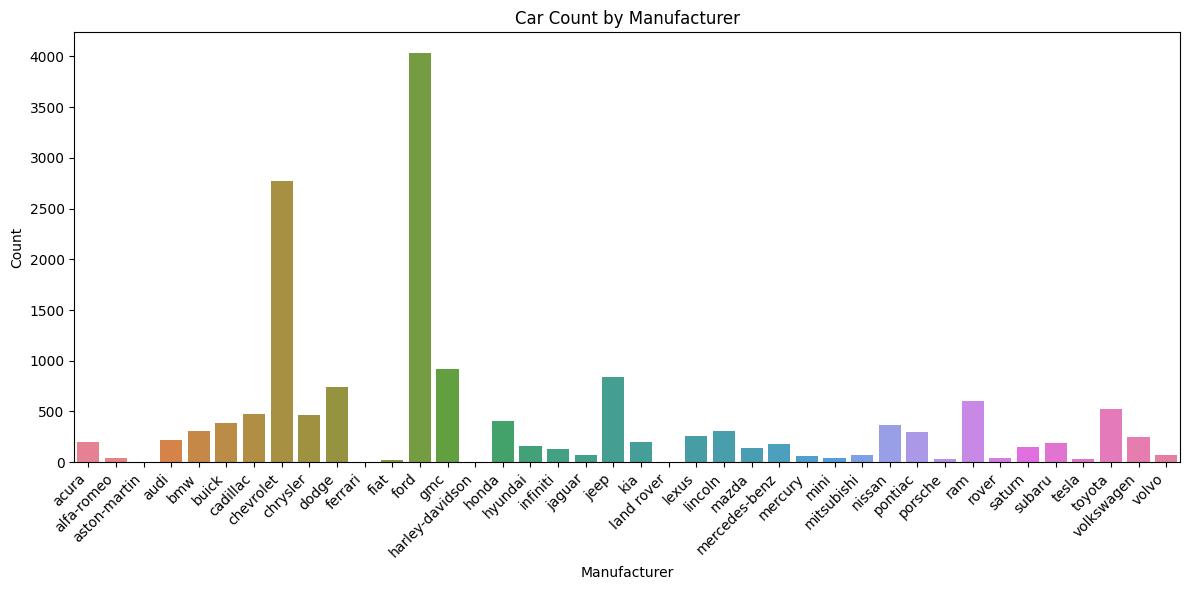

In [10]:
plt.figure(figsize=(12, 6))

df_sorted_by_manufacturer = df.sort_values('manufacturer')
sns.countplot(x='manufacturer', data=df_sorted_by_manufacturer, hue='manufacturer')

plt.title('Car Count by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visual #2: Car Price by Manufacturer

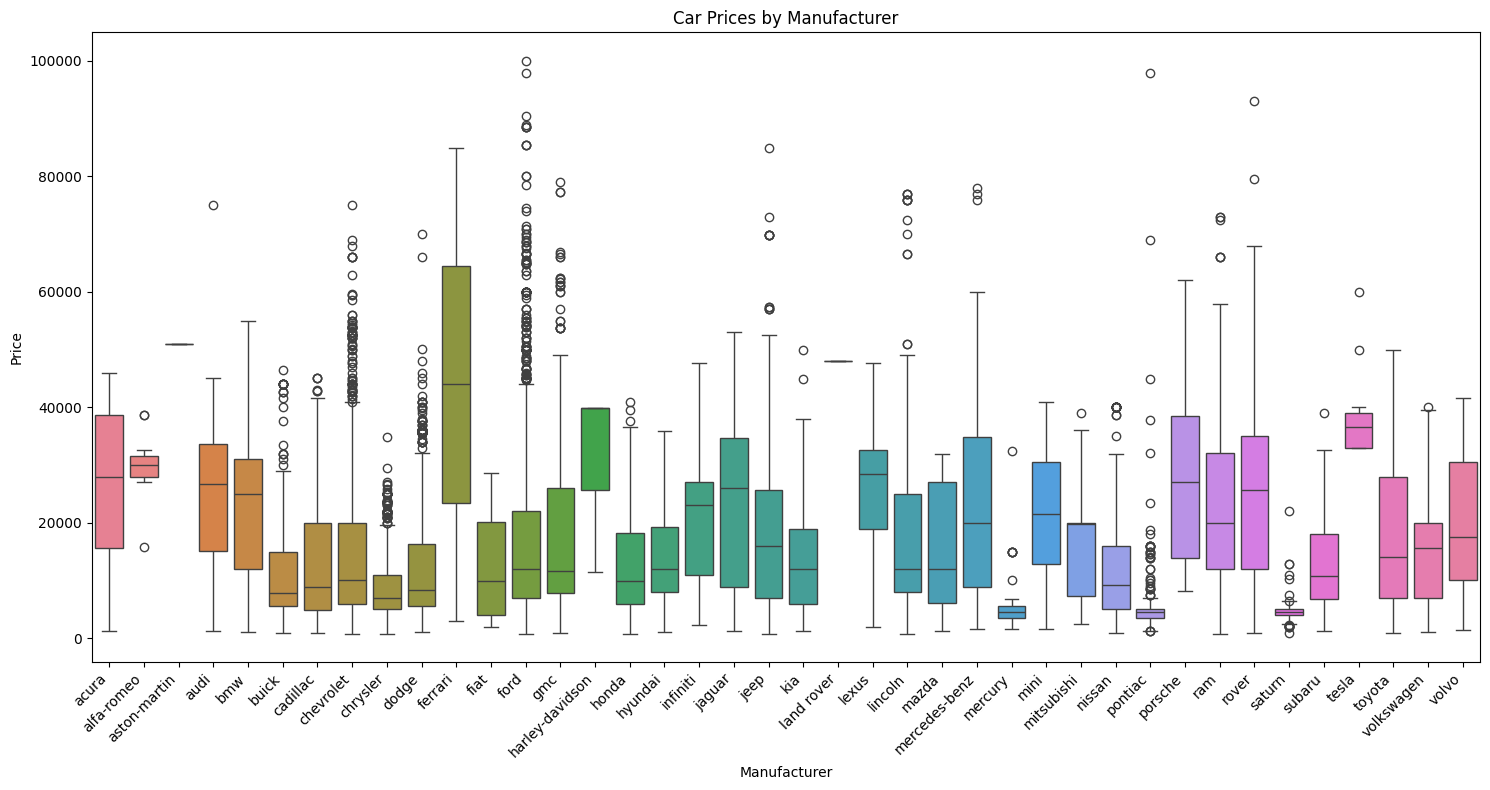

In [11]:
plt.figure(figsize=(15, 8))

df_sorted_by_manufacturer = df.sort_values('manufacturer')
sns.boxplot(x='manufacturer', y='price', hue='manufacturer', data=df_sorted_by_manufacturer)

plt.title('Car Prices by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Model Training

In [12]:
# Encode categorical variables
model_df = pd.get_dummies(df, columns=['manufacturer', 'condition', 'paint_color', 'type', 'fuel', 'cylinders'], drop_first=True)

# Select features and target variable
features = ['age', 'odometer'] + [col for col in model_df.columns if col.startswith((
    'manufacturer_', 
    'type_', 
    'condition_', 
    'fuel_', 
    'paint_color_',
    'cylinders_'
))]

In [13]:
X = model_df[features]
y = model_df['price']

# Form testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Accuracy

In [14]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

R-squared: 0.9020
Mean Absolute Error: $1907.10
Root Mean Squared Error: $3956.78


# Visual #3: Predicted Price vs. Actual Price

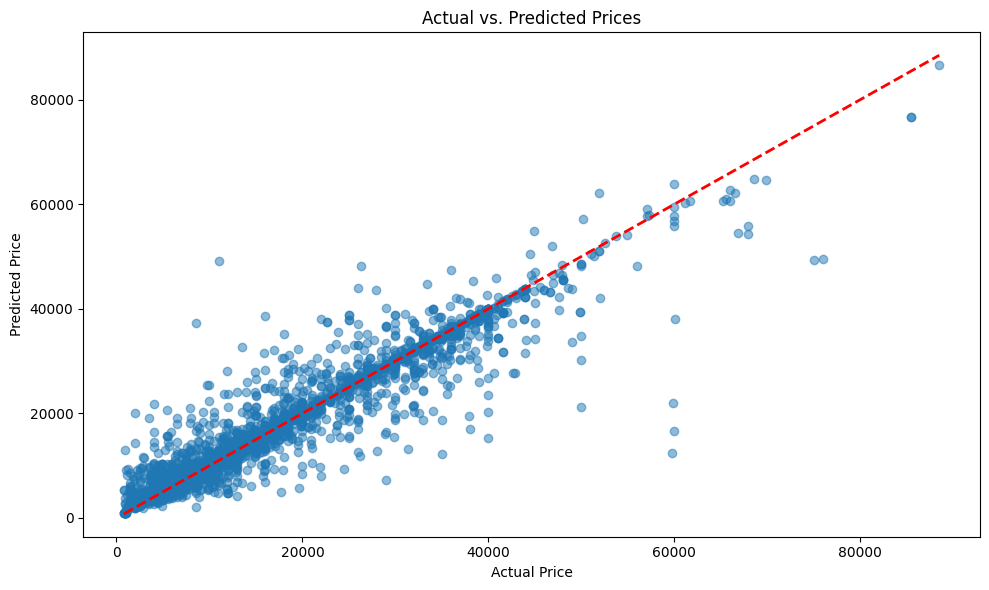

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.tight_layout()
plt.show()

# Interactive interface

In [16]:
manufacturers = sorted(df['manufacturer'].unique().tolist())
types = sorted(df['type'].unique().tolist())
conditions = sorted(df['condition'].unique().tolist())
fuel = sorted(df['fuel'].unique().tolist())
paint_colors = sorted(df['paint_color'].unique().tolist())
cylinders = sorted(df['cylinders'].unique().tolist())

for option_list in [manufacturers, types, conditions, fuel, paint_colors, cylinders]:
    option_list.insert(0, None)

manufacturer_dropdown = widgets.Dropdown(
    options=manufacturers,
    description='Make:',
    disabled=False,
)
type_dropdown = widgets.Dropdown(
    options=types,
    description='Type:',
    disabled=False,
)
condition_dropdown = widgets.Dropdown(
    options=conditions,
    description='Condition:',
    disabled=False
)
fuel_dropdown = widgets.Dropdown(
    options=fuel,
    description='Fuel:',
    disabled=False
)
paint_color_dropdown = widgets.Dropdown(
    options=paint_colors,
    description='Paint Color:',
    disabled=False
)
cylinders_dropdown = widgets.Dropdown(
    options=cylinders,
    description='Cylinders:',
    disabled=False
)
age_input = widgets.IntText(
    value=0,
    description='Car Age:',
    disabled=False
)
miles_input = widgets.IntText(
    value=0,
    description='Miles:',
    disabled=False
)

In [17]:
feature_columns = X.columns.tolist()

submit_button = widgets.Button(description="Submit", button_style="info")
output = widgets.Output()

def update_values(manufacturer, _type, condition, fuel, paint_color, age, miles, cylinders):
    columns_dict = {col: 0 for col in feature_columns}
    categories = [
        ('manufacturer', manufacturer),
        ('type', _type),
        ('condition', condition),
        ('fuel', fuel),
        ('paint_color', paint_color),
        ('age', age),
        ('odometer', miles),
        ('cylinders', cylinders)
    ]

    for key, value in categories:
        if key not in ["age", "odometer"]:
            val = 1 if value else 0
            columns_dict[f'{key}_{value}'] = val
        else:
            columns_dict[key] = value

    new_car = pd.DataFrame(columns_dict, index=[0])
    new_car = new_car[X.columns]
    
    predicted_price = model.predict(new_car)
    return f"Predicted price: ${predicted_price[0]:.2f}"

def on_submit(b):
    with output:
        output.clear_output()
        result = update_values(
            manufacturer_dropdown.value,
            type_dropdown.value,
            condition_dropdown.value,
            fuel_dropdown.value,
            paint_color_dropdown.value,
            age_input.value,
            miles_input.value,
            cylinders_dropdown.value
        )
        print(result)
        
submit_button.on_click(on_submit)

display(
    manufacturer_dropdown, 
    type_dropdown, 
    condition_dropdown, 
    fuel_dropdown, 
    paint_color_dropdown,
    cylinders_dropdown,
    age_input, 
    miles_input, 
    submit_button, 
    output
)

Dropdown(description='Make:', options=(None, 'acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'c…

Dropdown(description='Type:', options=(None, 'SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'o…

Dropdown(description='Condition:', options=(None, 'excellent', 'fair', 'good', 'like new', 'new', 'salvage'), …

Dropdown(description='Fuel:', options=(None, 'diesel', 'electric', 'gas', 'hybrid', 'other'), value=None)

Dropdown(description='Paint Color:', options=(None, 'black', 'blue', 'brown', 'custom', 'green', 'grey', 'oran…

Dropdown(description='Cylinders:', options=(None, '10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders'…

IntText(value=0, description='Car Age:')

IntText(value=0, description='Miles:')

Button(button_style='info', description='Submit', style=ButtonStyle())

Output()